In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [20]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [21]:
index_25_porciento = round((df.shape[0]) * 0.025)
df = df.iloc[index_25_porciento: -index_25_porciento]

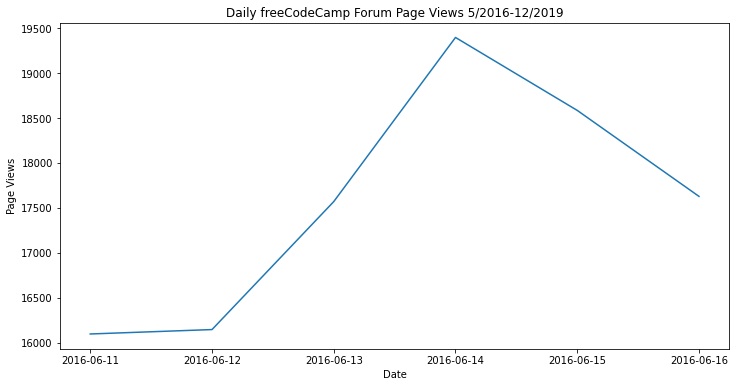

In [26]:
fig, axis = plt.subplots(figsize = (12, 6))

axis.set_xlabel('Date')
axis.set_ylabel('Page Views')
axis.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
axis.plot(df)

